# Python Primer

This is a quick primer on some Python features that you may not have seen before.  It assumes some basic knowledge of Python.

## Running Python

1. Normal

    ```bash
    $ python foo.py
    ```

1. Interactive

    ```bash
    $ python
    ```

1. iPython (recommended)

    ```bash
    $ ipython
    ```

1. Jupyter / iPython notebook (strongly recommended)

    ```bash
    $ jupyter notebook
    ```
    This is similar to iPython but browser based. It has some very cool features.
    
1. IDEs: PyCharm or Visual Studio Code

    You are on your own to figure this out. It may be very nice once setup, but you also may have some startup costs to configure it to work nicely with anaconda, matplotlib, etc. I will not support issues with IDEs.  PyCharm offers free licenses for students.
    
### A typical setup

- Create a folder where you will do your work.
- Folder will hold both python files `.py` and notebook files `.ipynb`.
- Define most/all functions the `.py` file
- Demonstrate/interact with your code in the `.ipynb` file.

To get started,

- Launch a jupyter notebook session from this folder.

```bash
$ cd ~/project1
$ jupyter notebook
```
- Open web browser to point to this jupyter notebook session.  
- Create a notebook and import `.py` files as needed
- You can edit the `.py` files in the notebook brower interface or your favorite text editor / IDE.

## Notebooks

### Running a cell
A cell is a block of code. Click the cell below and press the "play" button above or type Shift+Enter. The code will run, print output, and then advance to the next cell. Type Ctrl+Enter to run but not advance.

In [1]:
x = 2**8
print(x)

256


### Running code in another file
Create a file in the same directory called ``hello.py`` with this line

```python
print 'hello world'
```

Now you can run it from jupyter:

In [2]:
%run hello.py

hello world!


### Importing code from another file

Define an `add` function in the file called `hello.py`:

```python
def add(x, y):
    return x + y
```
And then import it.


In [3]:
from hello import add

Now you can freely use the `add` function.

In [4]:
add(4, 5)

9

## Matplotlib

Be sure to execute the following "[magic function](https://ipython.readthedocs.io/en/stable/interactive/tutorial.html#magics-explained)".

In [5]:
%matplotlib inline 

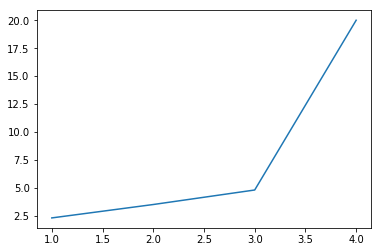

In [6]:
import matplotlib.pyplot as plt
x = [1, 2, 3, 4]
y = [2.3, 3.5, 4.8, 20]
plt.plot(x, y)
plt.show()

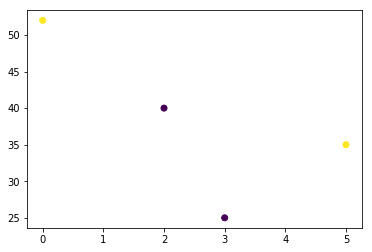

In [7]:
# example data set, organized by "column"
years = [5, 0, 3, 2]
salary = [35, 52, 25, 40]
credit = [1, 1, -1, -1]
plt.scatter(years, salary, c=credit)
plt.show()

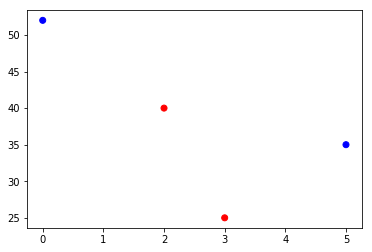

In [9]:
# customize the colors
colormap = {1 : 'b', -1: 'r'}
colors = []
for cred in credit:
    colors.append(colormap[cred])
plt.scatter(years, salary, c=colors)
plt.show()

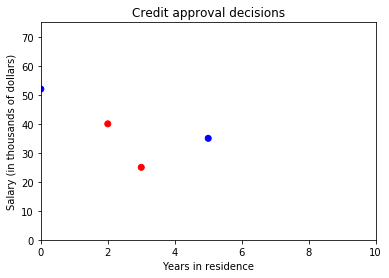

In [11]:
# add labels, adjust axis limits, etc.
plt.scatter(years, salary, c=colors)
plt.xlim(0, 10)
plt.ylim(0, 75)
plt.xlabel('Years in residence')
plt.ylabel('Salary (in thousands of dollars)')
plt.title('Credit approval decisions')
plt.show()

## Python tricks

### Comprehensions

In [12]:
odds = [x for x in range(20) if x % 2 != 0]    # list comprehension

In [13]:
odds

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

In [14]:
squared = { y**2 for y in [-2, -1, 1, 2] }            # set comprehension

In [15]:
squared

{1, 4}

### Iterators

An iterator allows you to traverse a collection of elements, one element at a time "on demand".

In [16]:
xs = [1, 2, 3]

In [17]:
it = iter(xs)    # get an iterator

In [18]:
next(it)         # take its values with next

1

In [19]:
next(it)

2

In [20]:
next(it)

3

In [21]:
next(it)         # get a  StopIteration exception when no values left

StopIteration: 

You can also loop over iterators

In [22]:
it = iter(xs)
for x in it:
    print(x)

1
2
3


### Generators

A generator is a special kind of iterator where the collection of values do not exist but instead are *generated* as needed.  This is called **lazy evaluation**.

In [23]:
def lazy_integers(n=1):
    while True:
        yield n  # a function with yield statement creates a generator
        n += 1

In [25]:
ints = lazy_integers(10)   # an infinite sequence!  generated lazily
ints

<generator object lazy_integers at 0x11553ff68>

In [26]:
next(ints)

10

In [27]:
next(ints)

11

In [28]:
for i in ints:
    print(i)
    if i % 10 == 0:
        break

12
13
14
15
16
17
18
19
20


In [29]:
for i in ints:
    print(i)
    if i % 10 == 0:
        break

21
22
23
24
25
26
27
28
29
30


In [37]:
## TODO: writer generator that takes a collection 
#        and generates consecutive pairs
def pairs(xs):
    pass
        
        
for p in pairs([1, 2, 3, 4]):
    print(p)

TypeError: 'NoneType' object is not iterable

The `itertools` module has lots of cool and handy functions.

### Generator comprehensions

Same idea as list comprehensions but values are generated lazily.

In [ ]:
# pay attention: [] vs. () 
generated_odds = (x for x in range(20) if x % 2 != 0)    

In [ ]:
generated_odds

In [ ]:
next(generated_odds)

In [ ]:
next(generated_odds)

In [ ]:
squares = (x**2 for x in lazy_integers())   # another infinite sequence, generated lazily!

In [ ]:
next(squares), next(squares), next(squares), next(squares)

### Generator comprehensions vs. list comprehensions

A list comprehension produces a list, which you can save and reuse.

A generator comprehension produces an iterator.  Once you reach the end, that's it!

This can lead to subtle bugs.

In [ ]:
list_odds = [x for x in range(6) if x % 2 != 0]
generated_odds = (x for x in range(6) if x % 2 != 0) 

In [ ]:
print("print list, round 1")
for x in list_odds:
    print(x)
print("print list, round 2")
for x in list_odds:
    print(x)

In [ ]:
print("print generator, round 1")
for x in generated_odds:
    print(x)
print("print generator, round 2")   # iterator is at its end, nothing will print in round 2
for x in generated_odds:
    print(x)

If you have a generator, but want a list, use the `list` builtin function.

In [ ]:
evens = (x for x in range(6) if x % 2 == 0) 
evens_list = list(evens)
evens_list

In [ ]:
next(evens)  # should raise StopIteration exception

### Passing functions as parameters

In [ ]:
def double(x): return 2 * x 
def square(x): return x * x 
def add(x, y): return x + y
def multiply(x, y): return x * y
def is_odd(x): return x % 2 == 1

In [ ]:
def my_map(f, L):
    """Applies function f to each item in L, returning a list of results"""
    L2 = []
    for item in L:
        L2.append(f(item))
    return L2

In [ ]:
x = [1, 2, 3, 4, 5]

In [ ]:
my_map(double, x)

In [ ]:
my_map(square, x)

### Map and Filter

Builtin functions that take a function as an argument and apply it to each item in a collection.

In [ ]:
list(map(double, x))

In [ ]:
list(filter(is_odd, x))

### Partial

In [ ]:
from functools import partial
# partial function application (aka "currying")
double = partial(multiply, 2)    # make a new function

In [ ]:
double(12)

### Zip

In [ ]:
x = [1, 2, 3, 4]
y = ['a', 'b', 'c', 'd']
z = [1.0, 2.0, 3.0, 4.0]

triples = zip(x, y, z)

In [ ]:
list(triples)

In [ ]:
pairs = list(zip(x, y))

In [ ]:
pairs

In [ ]:
x, y = zip(*pairs)    # argument unpacking

In [ ]:
x, y